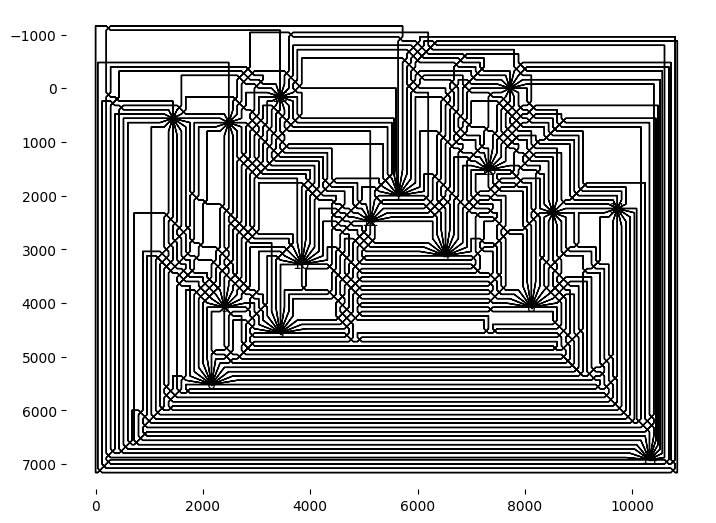

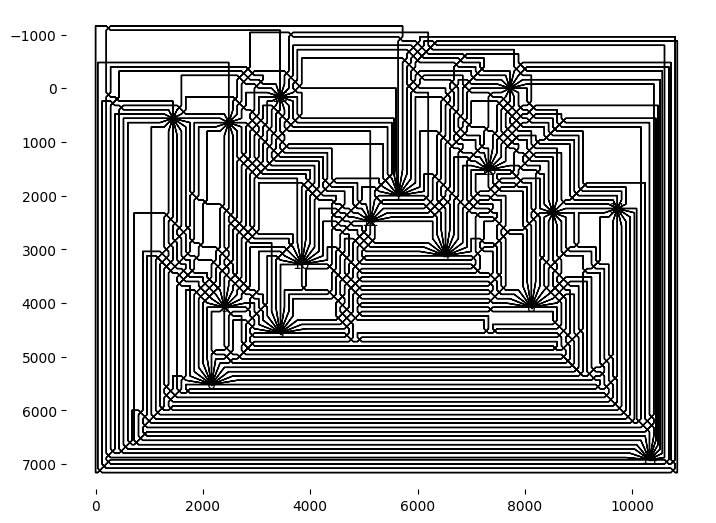

In [1]:
from ogdf_python import *

cppinclude("ogdf/basic/graph_generators/deterministic.h")
cppinclude("ogdf/fileformats/GraphIO.h")
cppinclude("ogdf/orthogonal/OrthoLayout.h")
cppinclude("ogdf/planarity/EmbedderMinDepthMaxFaceLayers.h")
cppinclude("ogdf/planarity/PlanarSubgraphFast.h")
cppinclude("ogdf/planarity/PlanarizationLayout.h")
cppinclude("ogdf/planarity/PlanarizationGridLayout.h")
cppinclude("ogdf/planarity/SubgraphPlanarizer.h")
cppinclude("ogdf/planarity/VariableEmbeddingInserter.h")
cppinclude("ogdf/planarlayout/MixedModelLayout.h")
cppinclude("ogdf/planarlayout/MMCBLocalStretch.h")


# cppinclude("ogdf/layered/SugiyamaLayout.h")

G = ogdf.Graph()
ogdf.completeGraph(G, 16)
GA = ogdf.GraphAttributes(G, ogdf.GraphAttributes.all)
# define graph attributes
GA.directed=False

for n in G.nodes:
    GA.label[n] = "%s" % n.index()
    # GA.x[n] = n.index()
    # GA.y[n] = n.index()

for e in G.edges:
    GA.arrowType[e] =0

# Initialize layout components
pl = ogdf.PlanarizationGridLayout()
crossMin = ogdf.SubgraphPlanarizer()
ps = ogdf.PlanarSubgraphFast[int]()
ps.runs(100)
ves = ogdf.VariableEmbeddingInserter()
ves.removeReinsert(ogdf.RemoveReinsertType.All)

# Set up PlanarizationLayout components
crossMin.setSubgraph(ps)
crossMin.setInserter(ves)
pl.setCrossMin(crossMin)

# emb = ogdf.EmbedderMinDepthMaxFaceLayers()
# pl.setEmbedder(emb)

# ol = ogdf.OrthoLayout()
# ol.separation(10.0)
# ol.cOverhang(0.4)

ol=ogdf.MixedModelLayout()
ls=ogdf.MMCBLocalStretch()
ol.setCrossingsBeautifier(ls)

pl.setPlanarLayouter(ol)

pl.call(GA)
GA

In [2]:

pl.numberOfCrossings()

588